Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.33      0.60      0.43         5
           2       0.50      0.33      0.40         6

    accuracy                           0.40        15
   macro avg       0.44      0.39      0.39        15
weighted avg       0.44      0.40      0.39        15

Accuracy Score: 0.4


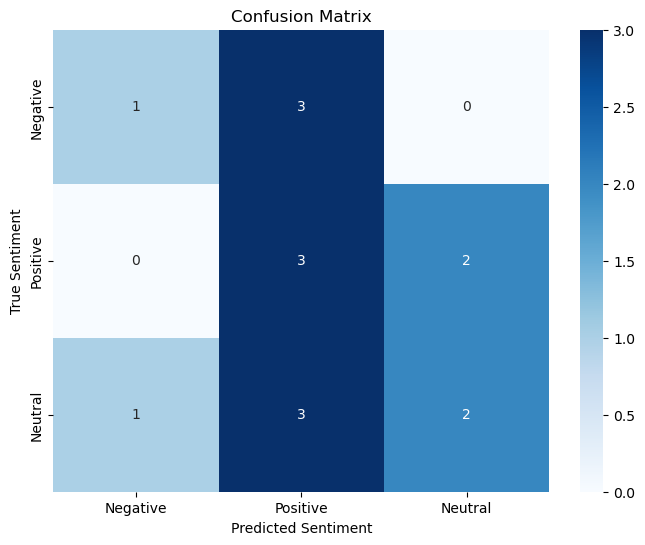

C:\Users\91859\AppData\Local\Temp\ipykernel_4632\2162477338.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")


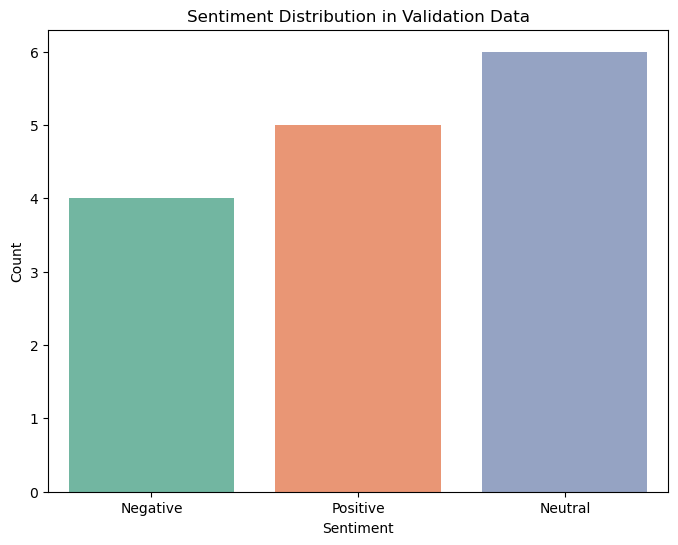

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create synthetic Twitter data with 50 entries
data = {
    "id": range(1, 51),
    "place": ["USA", "India", "UK", "Canada", "Australia"] * 10,
    "sentiment": [
        "positive", "negative", "neutral", "positive", "negative",
        "neutral", "positive", "negative", "neutral", "positive",
        "positive", "negative", "neutral", "negative", "positive",
        "neutral", "positive", "negative", "neutral", "positive",
        "negative", "positive", "neutral", "negative", "positive",
        "neutral", "positive", "negative", "neutral", "positive",
        "positive", "negative", "neutral", "positive", "negative",
        "neutral", "positive", "negative", "neutral", "positive",
        "negative", "positive", "neutral", "negative", "positive",
        "neutral", "positive", "negative", "neutral", "positive",
    ],
    "sentence": [
        "This product is amazing!", "I hate this experience.", "The weather is okay today.", 
        "Great work by the team!", "Awful service at the restaurant.", 
        "It's just another ordinary day.", "Fantastic effort by everyone!", 
        "Terrible customer support.", "Nothing special to mention.", "Absolutely love this app!",
        "Great improvement from the last version.", "Worst update ever.", 
        "Not bad, but could be better.", "Service was disappointing.", "Highly recommend this product.",
        "The movie was average.", "Loved the new features!", "The wait time is unbearable.", 
        "Neutral about this whole event.", "Superb performance in the competition.",
        "Not worth the money.", "Exceptional customer care.", "Mediocre food quality.", 
        "Not what I expected.", "Will definitely buy again.", "Room for improvement.", 
        "Exceeded my expectations!", "Disappointed with the outcome.", "Neutral feeling about it.",
        "Phenomenal results in the project!", "Could have been better.", 
        "Unparalleled quality of service.", "Not happy with the decision.", 
        "Neutral response from the audience.", "Absolutely thrilled with the results!", 
        "Would not recommend.", "Reasonable service.", "Great app for daily use!", 
        "Needs better design.", "Feeling indifferent.", "A delightful experience!", 
        "Horrible experience with the staff.", "It's just okay.", "Amazing creativity shown!", 
        "Bad packaging for the product.", "Neutral vibes overall.", "Highly satisfied with the purchase!", 
        "Worst day ever.", "Quite average in my opinion.", "Loved the attention to detail.",
    ],
}

# Convert to DataFrame
twitter_data = pd.DataFrame(data)

# Step 2: Split into training and validation datasets
train_data, validation_data = train_test_split(twitter_data, test_size=0.3, random_state=42)

# Step 3: Preprocessing
# Keep only the required columns
train_data = train_data[["sentiment", "sentence"]]
validation_data = validation_data[["sentiment", "sentence"]]

# Encode sentiment labels
def encode_sentiment(sentiment):
    if sentiment == "positive":
        return 1
    elif sentiment == "negative":
        return 0
    else:  # for neutral
        return 2

train_data["sentiment"] = train_data["sentiment"].apply(encode_sentiment)
validation_data["sentiment"] = validation_data["sentiment"].apply(encode_sentiment)

# Step 4: Vectorize text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data["sentence"])
y_train = train_data["sentiment"]

X_validation = vectorizer.transform(validation_data["sentence"])
y_validation = validation_data["sentiment"]

# Step 5: Train a sentiment analysis model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Validate the model
predictions = model.predict(X_validation)

# Step 7: Print evaluation metrics
print("Classification Report:\n", classification_report(y_validation, predictions))
print("Accuracy Score:", accuracy_score(y_validation, predictions))

# Plotting

# 1. Confusion Matrix Plot
conf_matrix = confusion_matrix(y_validation, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive", "Neutral"], yticklabels=["Negative", "Positive", "Neutral"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()

# 2. Sentiment Distribution Bar Plot (for validation data)
sentiment_counts = validation_data["sentiment"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")
plt.title("Sentiment Distribution in Validation Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ["Negative", "Positive", "Neutral"], rotation=0)
plt.show()


Please select the training CSV file.
Please select the validation CSV file.
Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.88      0.85       266
    Positive       0.84      0.92      0.87       277
     Neutral       0.92      0.77      0.84       285

    accuracy                           0.86       828
   macro avg       0.86      0.86      0.85       828
weighted avg       0.86      0.86      0.85       828

Accuracy Score: 0.855072463768116


C:\Users\91859\AppData\Local\Temp\ipykernel_4632\3104309491.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


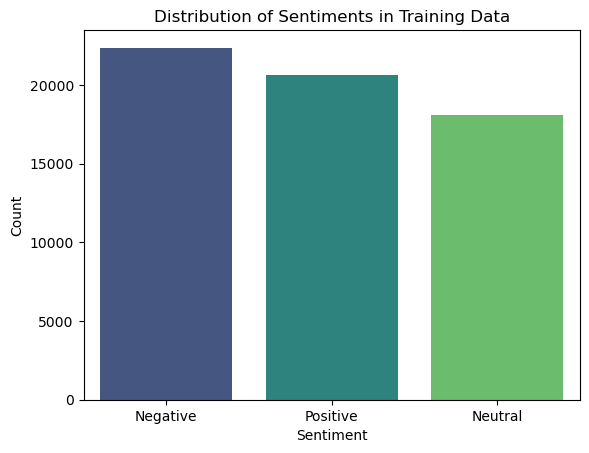

C:\Users\91859\AppData\Local\Temp\ipykernel_4632\3104309491.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=word_freq, palette="magma")


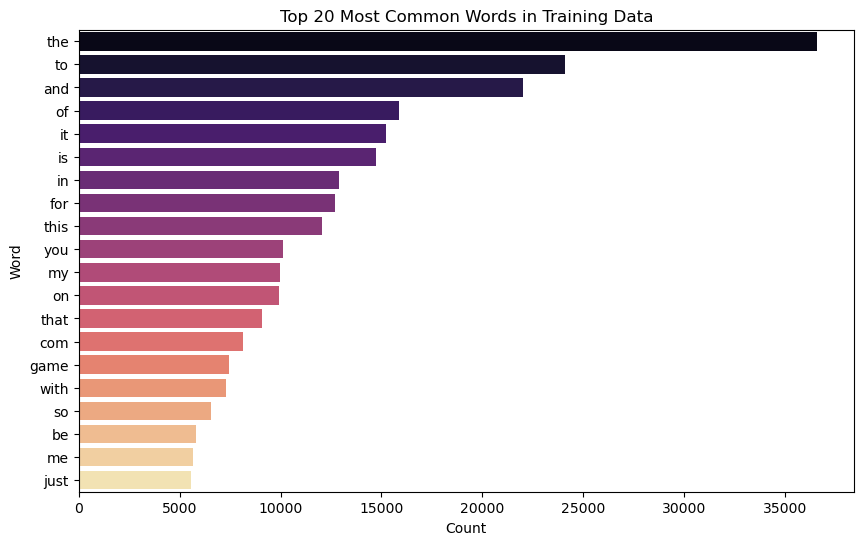

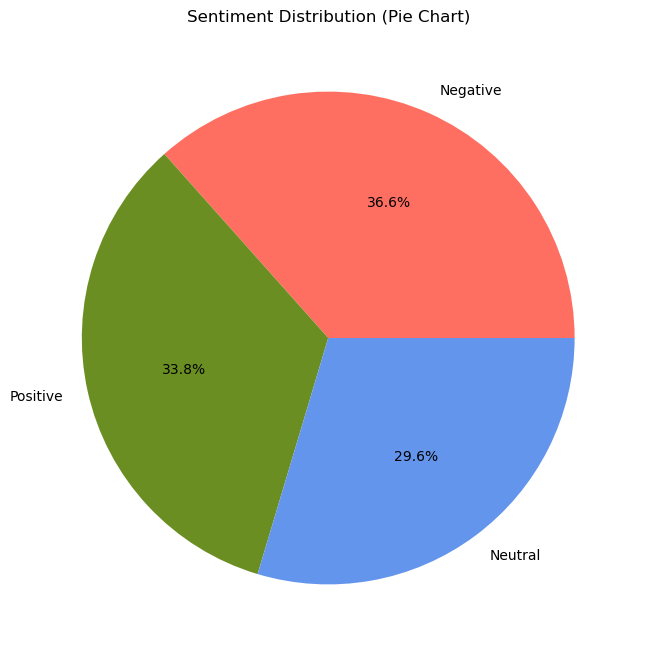

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Step 1: Upload the CSV files
Tk().withdraw()  # Hides the root window
print("Please select the training CSV file.")
twitter_training_file = askopenfilename(title="Select Training CSV File")

print("Please select the validation CSV file.")
twitter_validation_file = askopenfilename(title="Select Validation CSV File")

# Assuming the files have no headers
training_data = pd.read_csv(twitter_training_file, header=None)
validation_data = pd.read_csv(twitter_validation_file, header=None)

# Step 2: Assign column names
columns = ["id", "place", "sentiment", "sentence"]
training_data.columns = columns
validation_data.columns = columns

# Step 3: Preprocessing
# Keep only the required columns
training_data = training_data[["sentiment", "sentence"]]
validation_data = validation_data[["sentiment", "sentence"]]

# Remove rows with missing sentences
training_data.dropna(subset=["sentence"], inplace=True)
validation_data.dropna(subset=["sentence"], inplace=True)

# Clean and normalize sentiment values
training_data["sentiment"] = training_data["sentiment"].str.strip().str.lower()
validation_data["sentiment"] = validation_data["sentiment"].str.strip().str.lower()

# Encode sentiment labels
def encode_sentiment(sentiment):
    if sentiment == "positive":
        return 1
    elif sentiment == "negative":
        return 0
    elif sentiment == "neutral":
        return 2
    else:
        return None

training_data["sentiment"] = training_data["sentiment"].apply(encode_sentiment)
validation_data["sentiment"] = validation_data["sentiment"].apply(encode_sentiment)

# Drop rows with invalid sentiment values
training_data.dropna(subset=["sentiment"], inplace=True)
validation_data.dropna(subset=["sentiment"], inplace=True)

# Convert sentiment to integers
training_data["sentiment"] = training_data["sentiment"].astype(int)
validation_data["sentiment"] = validation_data["sentiment"].astype(int)

# Step 4: Vectorize text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(training_data["sentence"])
y_train = training_data["sentiment"]

X_validation = vectorizer.transform(validation_data["sentence"])
y_validation = validation_data["sentiment"]

# Step 5: Train a sentiment analysis model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Validate the model
predictions = model.predict(X_validation)

# Step 7: Print evaluation metrics
print("Classification Report:\n", classification_report(y_validation, predictions, labels=[0, 1, 2], target_names=["Negative", "Positive", "Neutral"]))
print("Accuracy Score:", accuracy_score(y_validation, predictions))

# Step 8: Visualization
# Plot the distribution of sentiments in training data
sentiment_counts = training_data["sentiment"].value_counts().reindex([0, 1, 2], fill_value=0)
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Sentiments in Training Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=["Negative", "Positive", "Neutral"])
plt.show()

# Plot the most common words in the training data
word_counts = X_train.sum(axis=0).A1
vocab = vectorizer.get_feature_names_out()
word_freq = pd.DataFrame({"word": vocab, "count": word_counts}).sort_values(by="count", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="word", data=word_freq, palette="magma")
plt.title("Top 20 Most Common Words in Training Data")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

# Additional Plot: Sentiment Pie Chart
plt.figure(figsize=(8, 8))
sentiment_pie_counts = training_data["sentiment"].value_counts().reindex([0, 1, 2], fill_value=0)
sentiment_labels = ["Negative", "Positive", "Neutral"]
plt.pie(sentiment_pie_counts, labels=sentiment_labels, autopct="%1.1f%%", colors=["#FF6F61", "#6B8E23", "#6495ED"])
plt.title("Sentiment Distribution (Pie Chart)")
plt.show()
